In [2]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt

In [4]:
file_path = 'globalterrorismdb_2021Jan-June_1222dist.xlsx'

# Load the sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows and the columns of the dataframe to understand its structure
df.head(), df.columns

(        eventid  iyear  imonth  iday  approxdate  extended resolution  \
 0  202101010004   2021       1     1         NaN         0        NaT   
 1  202101010005   2021       1     1  01/01/2021         0        NaT   
 2  202101010006   2021       1     1         NaN         0        NaT   
 3  202101010009   2021       1     1         NaN         0        NaT   
 4  202101010024   2021       1     2         NaN         0        NaT   
 
    country  country_txt  region  ...  \
 0       60        Egypt      10  ...   
 1       92        India       6  ...   
 2      228        Yemen      10  ...   
 3        4  Afghanistan       6  ...   
 4      182      Somalia      11  ...   
 
                                             addnotes  \
 0                                                NaN   
 1                                                NaN   
 2  There is doubt that this incident meets terror...   
 3  There is doubt that this incident meets terror...   
 4                   

In [5]:
# Defining custom function to display basic information about the dataset 
# including shape, datatypes, statistics, null values.
def basic_info(df):
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())
    print("="*50)
    print(f'Missing values in any of the columns this dataset are\n{df.isnull().sum(axis=0)}')
    
# Calling the custom function to display basic_info of Companies subset    
basic_info(df)

Shape of this dataset is (4960, 135).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(51), int64(29), object(54)
memory usage: 5.1+ MB
None
            eventid   iyear       imonth         iday     extended  \
count  4.960000e+03  4960.0  4960.000000  4960.000000  4960.000000   
mean   2.021039e+11  2021.0     3.744960    15.882661     0.092742   
std    1.722388e+06     0.0     1.717634     8.731039     0.290100   
min    2.021010e+11  2021.0     1.000000     1.000000     0.000000   
25%    2.021022e+11  2021.0     2.000000     8.000000     0.000000   
50%    2.021042e+11  2021.0     4.000000    16.000000     0.000000   
75%    2.021052e+11  2021.0     5.000000    24.000000     0.000000   
max    2.021073e+11  2021.0     6.000000    31.000000     1.000000   

           country       region     latitude    longitude  specificity  ...  \
count  4960.000000  4960.000000  4925.000000  49

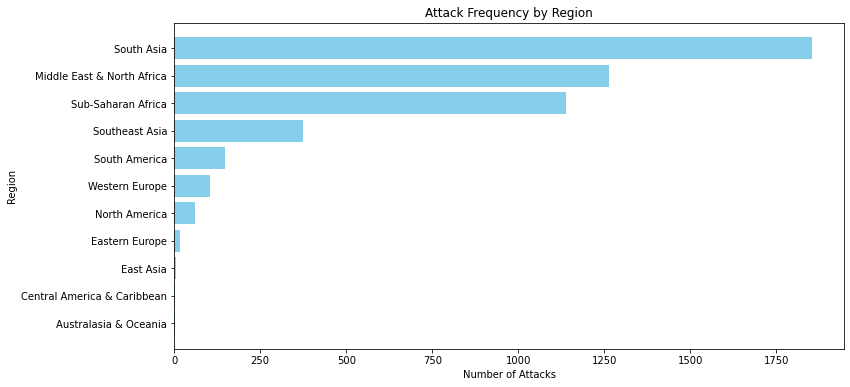

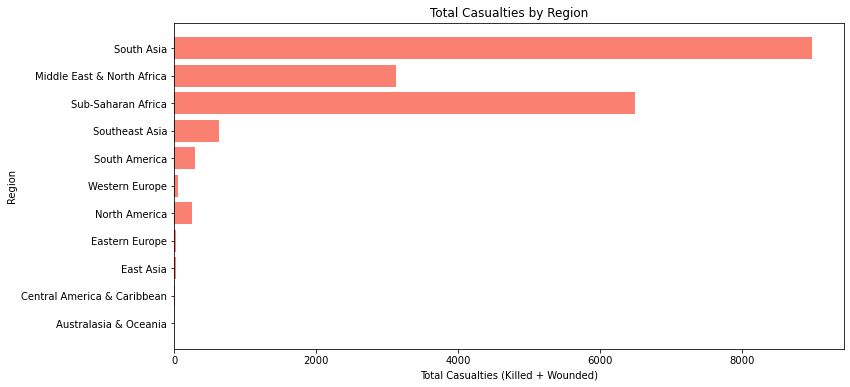

                     region_txt  attack_count  total_killed  total_wounded  average_casualties
7                    South Asia          1853        4671.0         4319.0            2.666096
4    Middle East & North Africa          1262        1488.0         1637.0            1.322667
9            Sub-Saharan Africa          1137        4836.0         1656.0            4.939734
8                Southeast Asia           373         374.0          260.0            1.068571
6                 South America           147         108.0          185.0            0.760563
10               Western Europe           105           8.0           40.0            0.076190
5                 North America            59          42.0          203.0            0.711864
3                Eastern Europe            16           8.0           14.0            0.500000
2                     East Asia             5           8.0           16.0            1.600000
1   Central America & Caribbean             2     

In [8]:
# Ensure that the columns relevant to frequency and severity are numeric
df['nkill'] = pd.to_numeric(df['nkill'], errors='coerce')
df['nwound'] = pd.to_numeric(df['nwound'], errors='coerce')

# Grouping the data by region to get the frequency of attacks and total casualties
region_trends = df.groupby('region_txt').agg(
    attack_count=('eventid', 'count'),
    total_killed=('nkill', 'sum'),
    total_wounded=('nwound', 'sum'),
    average_casualties=('nkill', 'mean')
).reset_index()

# Sorting by attack count for better visualization
region_trends = region_trends.sort_values(by='attack_count', ascending=False)

# Plotting attack frequency by region
plt.figure(figsize=(12, 6))
plt.barh(region_trends['region_txt'], region_trends['attack_count'], color='skyblue')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.title('Attack Frequency by Region')
plt.gca().invert_yaxis()
plt.show()

# Plotting total casualties by region
plt.figure(figsize=(12, 6))
plt.barh(region_trends['region_txt'], region_trends['total_killed'] + region_trends['total_wounded'], color='salmon')
plt.xlabel('Total Casualties (Killed + Wounded)')
plt.ylabel('Region')
plt.title('Total Casualties by Region')
plt.gca().invert_yaxis()
plt.show()

# Display the summarized data
print(region_trends.to_string())


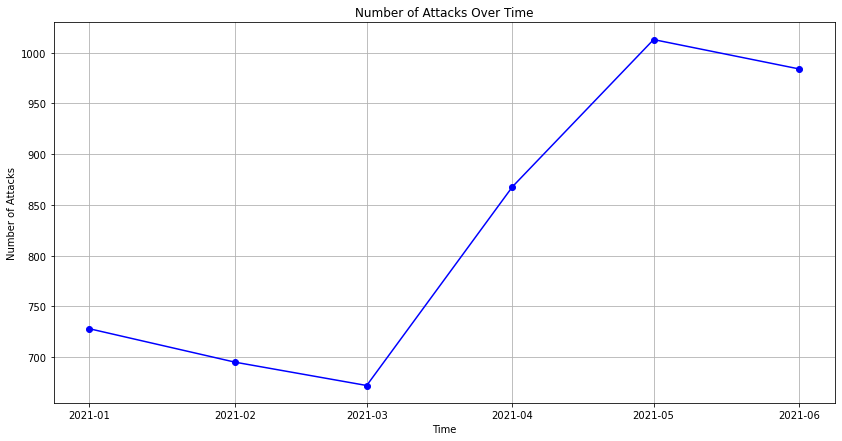

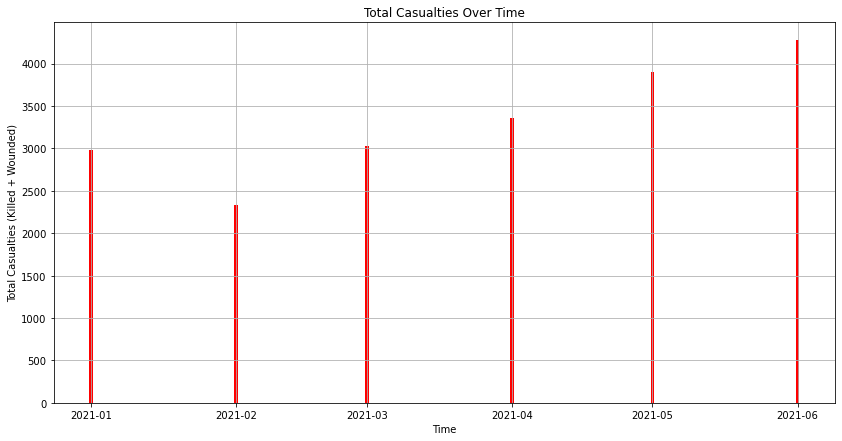

In [17]:
# Manually create a date string column
time_series_data['date_str'] = (
    time_series_data['iyear'].astype(str) + '-' + 
    time_series_data['imonth'].astype(str).str.zfill(2) + '-01'
)

# Convert the date string to a datetime object
time_series_data['date'] = pd.to_datetime(time_series_data['date_str'], format='%Y-%m-%d')

# Plotting attack trends over time
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['date'], time_series_data['attack_count'], marker='o', linestyle='-', color='blue')
plt.xlabel('Time')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks Over Time')
plt.grid(True)
plt.show()

# Plotting casualties trends over time (Killed + Wounded)
plt.figure(figsize=(14, 7))
plt.bar(time_series_data['date'], time_series_data['total_killed'] + time_series_data['total_wounded'], color='red')
plt.xlabel('Time')
plt.ylabel('Total Casualties (Killed + Wounded)')
plt.title('Total Casualties Over Time')
plt.grid(True)
plt.show()
